# Lista 1

## zadanie 1

In [1]:
import requests
import pandas as pd
from io import StringIO

# URL do pliku
url = 'https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad1_lista1.txt'

# Pobranie danych z wyłączoną weryfikacją SSL
response = requests.get(url, verify=False)

# Ostrzeżenie o wyłączonym SSL
import warnings
warnings.filterwarnings('ignore')

# Sprawdzenie, czy pobranie się powiodło
if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

# Wczytanie danych do DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)

# Nadanie nazw kolumnom (jeśli potrzebne)
df.columns = ['X', 'Y']

# Wyświetlenie pierwszych kilku wierszy danych
print(df.head())



          X          Y
0  0.204906  -3.220550
1  0.098946  -1.125868
2  2.063672  12.928829
3  0.090608   6.917862
4  0.458298  -0.604774


C:\Users\Maria Nowacka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prac.im.pwr.edu.pl'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [2]:
X, Y = df['X'], df['Y']

In [3]:
import matplotlib.pyplot as plt, numpy as np
from scipy.optimize import curve_fit

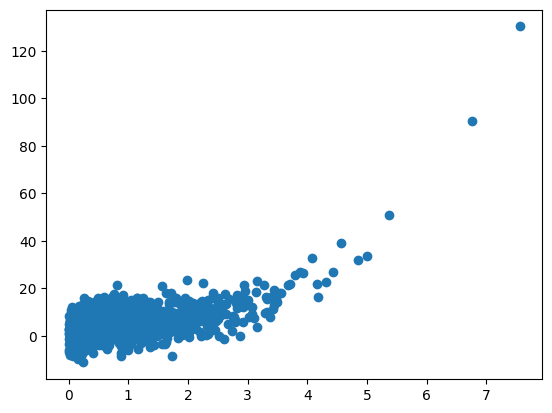

In [4]:
plt.scatter(X, Y)

In [5]:
def model(x, a, b):
    return a*np.exp(b*x)

In [6]:
popt, pcov = curve_fit(model, X, Y)
a, b = popt
print(f'Y = {a:.3f} * exp({b:.3f} * X)')

Y = 2.990 * exp(0.500 * X)


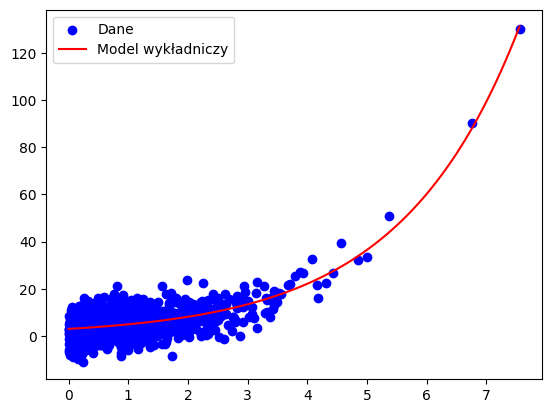

In [7]:
# Rysowanie wykresu rozproszenia
plt.scatter(X, Y, label='Dane', color='blue')

# Rysowanie dopasowanej funkcji wykładniczej
X_fit = np.linspace(min(X), max(X), 100)
Y_fit = model(X_fit, *popt)
plt.plot(X_fit, Y_fit, label='Model wykładniczy', color='red')
plt.legend()

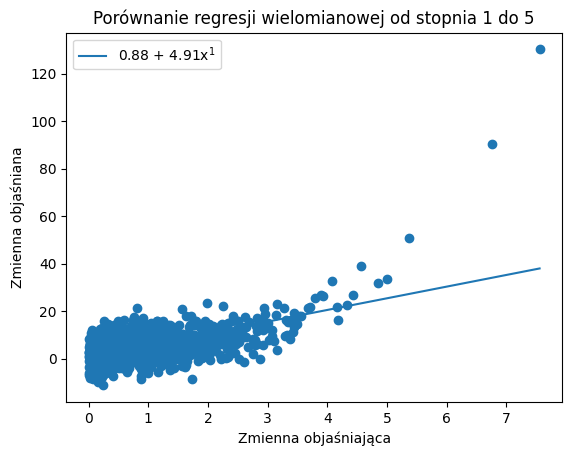

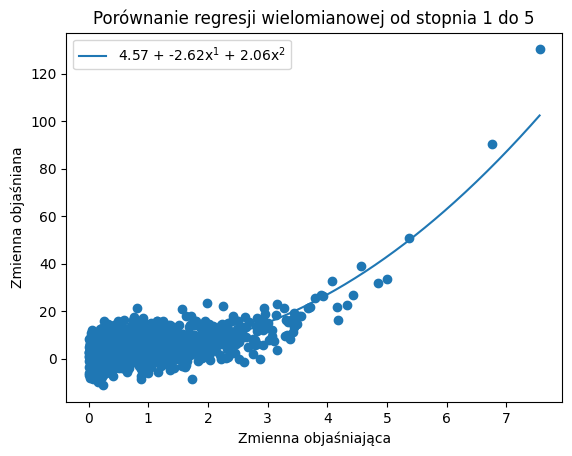

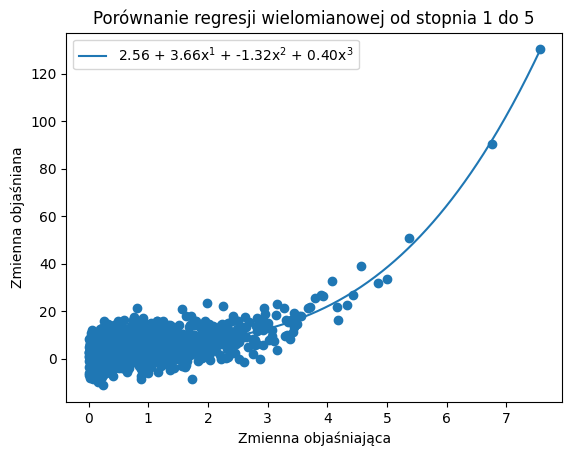

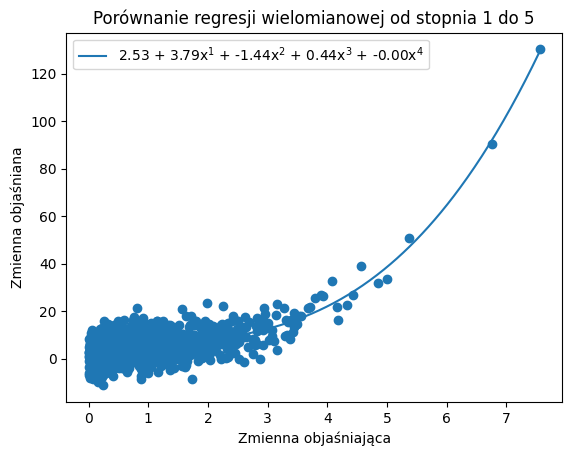

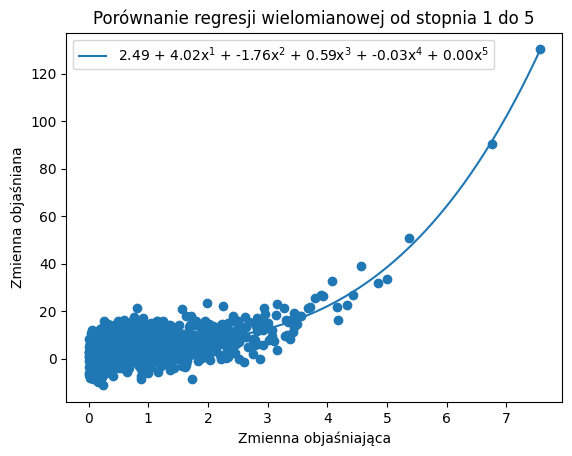

In [8]:
x_linspace = np.linspace(min(X), max(X), 500)
stopnie = list(range(1, 6))
for stopien in stopnie:
    # Dopasowanie wielomianu o zadanym stopniu
    wspolczynniki = np.polyfit(X, Y, stopien)

    # Utworzenie funkcji wielomianowej
    poly_func = np.poly1d(wspolczynniki)

    # Wygenerowanie wartości Y na podstawie modelu (dla ciągłej linii)
    Y_fit = poly_func(x_linspace)

    # Obliczenie przewidywanych wartości Y dla danych X
    Y_pred = poly_func(X)
    
    # Generowanie wzoru wielomianu w formacie LaTeX
    wzor_wielomianu = " + ".join([f"{coef:.2f}x$^{i}$" if i > 0 else f"{coef:.2f}" 
                                  for i, coef in enumerate(reversed(poly_func.coefficients))])
    # Rysowanie dopasowania
    plt.plot(x_linspace, Y_fit, label=f'{wzor_wielomianu}')
    plt.scatter(X, Y)

    # Dodatkowe elementy wykresu
    plt.xlabel('Zmienna objaśniająca')
    plt.ylabel('Zmienna objaśniana')
    plt.title('Porównanie regresji wielomianowej od stopnia 1 do 5')
    plt.legend()
    plt.show()


## zadanie 2

In [9]:
url2 = "https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad2_lista1.txt"
response = requests.get(url2, verify=False)

if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

df2 = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['values'])

# Kolumna z danymi
values = df2['values']
print(df2['values'])

0       1.838676
1       1.855805
2       0.697521
3       1.296238
4       0.755621
          ...   
9995   -0.264952
9996    1.841796
9997   -0.019291
9998    0.016198
9999    2.329453
Name: values, Length: 10000, dtype: float64


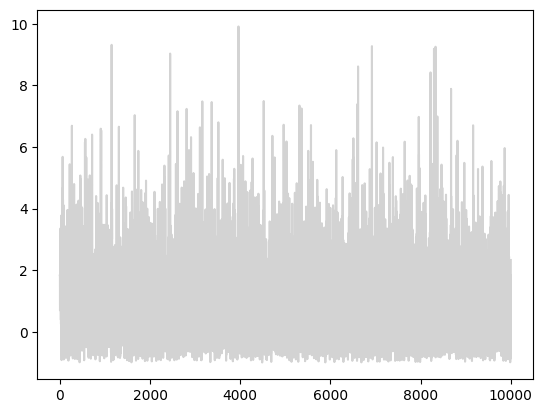

In [10]:
# Wykres surowych danych
plt.plot(df2, label='Dane surowe', color='lightgrey')
def simple_moving_average(data, window_size):
    return data.rolling(window=window_size, center=True).mean()
# Średnie ruchome o podstawie 11, 25 oraz 2p+1
window_11 = simple_moving_average(df2, 11)
window_25 = simple_moving_average(df2, 25)
p = 9
window_2p1 = simple_moving_average(df2, 2 * p + 1)


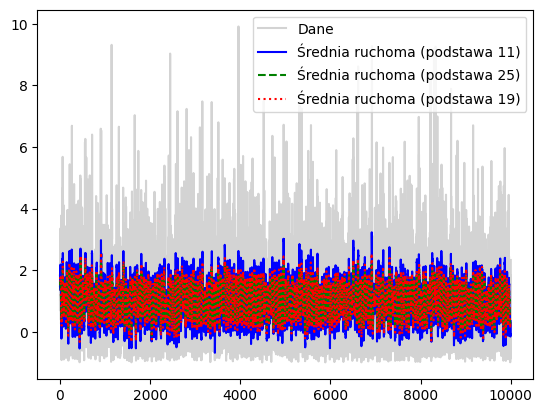

In [11]:
# Wykresy średnich ruchomych
plt.plot(values, label = 'Dane', color = 'lightgrey')
plt.plot(window_11, label='Średnia ruchoma (podstawa 11)', color='blue')
plt.plot(window_25, label='Średnia ruchoma (podstawa 25)', color='green', linestyle = '--')
plt.plot(window_2p1, label=f'Średnia ruchoma (podstawa {2*p+1})', color='red', linestyle = ':')
plt.legend()

In [12]:
def custom_moving_average(data, p):
    ma_values = []
    n = len(data)
    window_size = 2 * p + 1

    # Iterujemy przez dane, ale tylko od p do n - p
    for t in range(p, n - p):
        window_sum = 0

        # Sumujemy wartości od -p do p dla bieżącego punktu t
        for j in range(-p, p + 1):
            window_sum += data[t + j]

        # Obliczamy średnią dla tego punktu
        ma_value = window_sum / window_size
        ma_values.append(ma_value)

    # Uzupełniamy początkowe i końcowe wartości NaN
    ma_values = [None] * p + ma_values + [None] * p
    return pd.Series(ma_values)


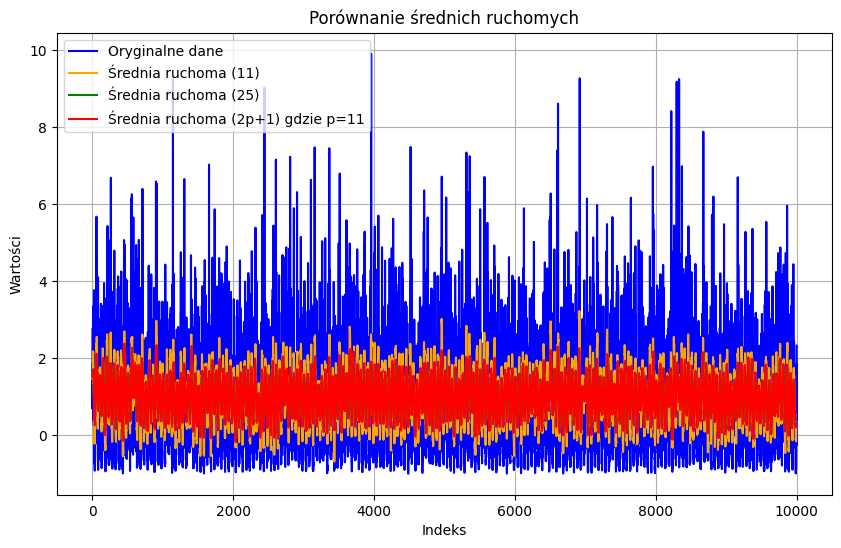

In [13]:
# Obliczanie średnich ruchomych dla różnych okien
p_11 = 5  # Średnia ruchoma 11 to p=5
ma_11 = custom_moving_average(values, p_11)

p_25 = 12  # Średnia ruchoma 25 to p=12
ma_25 = custom_moving_average(values, p_25)

# Podstawa 2p + 1, gdzie p jest dowolną liczbą wybraną przez użytkownika
p = 11
ma_2p1 = custom_moving_average(values, p)

# Wykres danych
plt.figure(figsize=(10, 6))
plt.plot(values, label='Oryginalne dane', color='blue')
plt.plot(ma_11, label='Średnia ruchoma (11)', color='orange')
plt.plot(ma_25, label='Średnia ruchoma (25)', color='green')
plt.plot(ma_2p1, label=f'Średnia ruchoma (2p+1) gdzie p={p}', color='red')
plt.legend()
plt.title('Porównanie średnich ruchomych')
plt.xlabel('Indeks')
plt.ylabel('Wartości')
plt.grid(True)
plt.show()

## zadanie 3

In [14]:
from scipy.stats import linregress

In [15]:
url3 = "https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad3_lista1.txt"

In [16]:
response = requests.get(url3, verify=False)

if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

df3 = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)


In [17]:
x = df2
y = df3

In [18]:
# Funkcja do obliczenia współczynnika nachylenia (b1) i wyrazu wolnego (b0)
def oblicz_regresje(X, Y):
    # Obliczenie średnich X i Y
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    # Obliczenie współczynnika b1
    s1 = np.sum((X) * (Y - Y_mean))
    s2 = np.sum((X - X_mean) ** 2)
    b1 = s1 / s2

    # Obliczenie współczynnika b0
    b0 = Y_mean - b1 * X_mean

    return b0, b1

In [19]:
b0, b1 = oblicz_regresje(X, Y)

Współczynnik b0: 0.8776001510861358
Współczynnik b1: 4.910458457786704


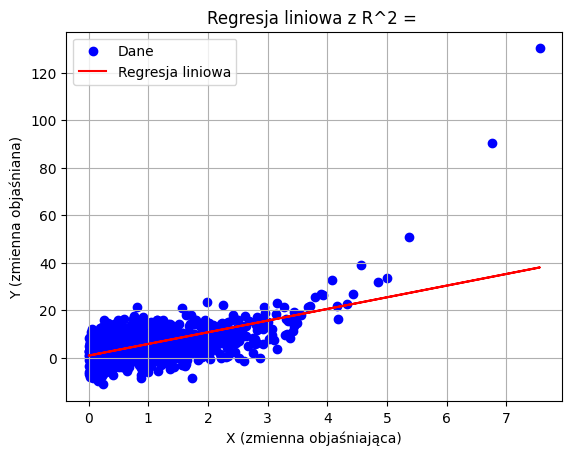

In [20]:
# Wyświetlenie wyników
print(f"Współczynnik b0: {b0}")
print(f"Współczynnik b1: {b1}")

# Rysowanie wykresu
plt.scatter(X, Y, label='Dane', color='blue')
plt.plot(X, b0 + b1 * X, label='Regresja liniowa', color='red')
plt.legend()
plt.title(f'Regresja liniowa z R^2 = ')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.grid(True)
plt.show()

In [21]:
# druga część
window1 = x.rolling(window=3, center=True).mean()
x_smooth = window1.dropna()
y_smooth = y[len(y)-len(x_smooth):]

Współczynnik b0: 0               NaN
values    25.367863
dtype: float64
Współczynnik b1: 0         NaN
values    0.0
dtype: float64


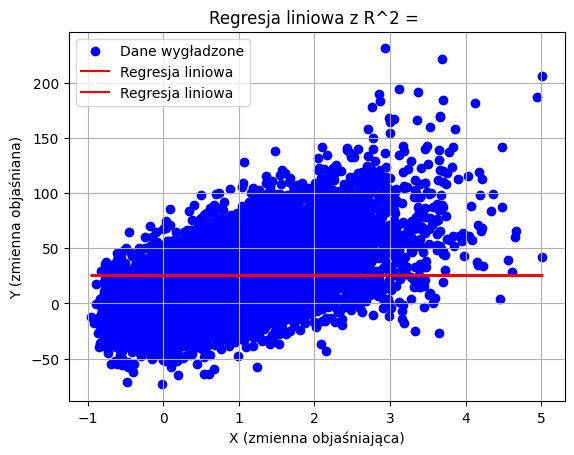

In [27]:
X, Y = x_smooth, y_smooth
result = oblicz_regresje(X, Y)
# Wyświetlenie wyników
print(f"Współczynnik b0: {result[0]}")
print(f"Współczynnik b1: {result[1]}")

# Rysowanie wykresu
plt.scatter(X, Y, label='Dane wygładzone', color='blue')
plt.plot(x_smooth, result[0] + result[1] * X, label='Regresja liniowa', color='red')
plt.legend()
plt.title(f'Regresja liniowa z R^2 = ')
plt.xlabel('X (zmienna objaśniająca)')
plt.ylabel('Y (zmienna objaśniana)')
plt.grid(True)
plt.show()

In [28]:
# print("Zad 4")
# # Krok 1: Wczytanie danych z pliku
# def read_columns_from_file(filename: str) -> Tuple[List[float], List[float]]:
#     column1 = []
#     column2 = []
# 
#     with open(filename, 'r') as file:
#         for line in file:
#             values = line.strip().split()  # Rozdzielenie linii na kolumny (domyślnie spacje)
#             if len(values) >= 2:  # Sprawdzenie, czy są co najmniej dwie kolumny
#                 column1.append(float(values[0]))  # Pierwsza kolumna
#                 column2.append(float(values[1]))  # Druga kolumna
# 
#     return column1, column2
# 
# # Użycie funkcji do wczytania danych
# filename = 'zad4_lista1.txt'  # Podaj nazwę swojego pliku
# X, Y = read_columns_from_file(filename)
# 
# # Konwersja do tablic numpy
# X = np.array(X)
# Y = np.array(Y)
# 
# # Krok 2: Wyznaczenie prostej regresji metodą najmniejszych kwadratów
# slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
# print(f'Współczynnik kierunkowy: {slope}, wyraz wolny: {intercept}')
# 
# # Krok 3: Obliczenie residuów (błędów)
# Y_pred = intercept + slope * X
# residuals = Y - Y_pred
# 
# # Krok 4: Zidentyfikowanie obserwacji odstających (metoda 3-sigma)
# std_residuals = np.std(residuals)
# outliers = np.abs(residuals) > 3 * std_residuals  # Obserwacje odstające
# 
# print(f'Liczba obserwacji odstających: {np.sum(outliers)}')
# 
# # Wizualizacja prostej regresji i obserwacji odstających
# plt.scatter(X, Y, label='Dane')
# plt.plot(X, Y_pred, color='red', label='Regresja liniowa')
# plt.scatter(X[outliers], Y[outliers], color='orange', label='Odstające', zorder=5)
# plt.legend()
# plt.title('Regresja liniowa z obserwacjami odstającymi')
# plt.xlabel('X (zmienna objaśniająca)')
# plt.ylabel('Y (zmienna objaśniana)')
# plt.show()
# 
# # Krok 5: Usunięcie obserwacji odstających
# X_clean = X[~outliers]
# Y_clean = Y[~outliers]
# 
# # Krok 6: Ponowne wyznaczenie prostej regresji po usunięciu obserwacji odstających
# slope_clean, intercept_clean, _, _, _ = stats.linregress(X_clean, Y_clean)
# print(f'Regresja liniowa (po usunięciu odstających): {slope_clean}x + {intercept_clean}')
# 
# # Wizualizacja prostej regresji po usunięciu odstających
# Y_pred_clean = intercept_clean + slope_clean * X_clean
# plt.scatter(X_clean, Y_clean, label='Dane po usunięciu odstających')
# plt.plot(X_clean, Y_pred_clean, color='green', label='Regresja liniowa (po usunięciu odstających)')
# plt.legend()
# plt.title('Regresja liniowa po usunięciu obserwacji odstających')
# plt.xlabel('X (zmienna objaśniająca)')
# plt.ylabel('Y (zmienna objaśniana)')
# plt.show()


In [29]:
# # Zad 5
# 
# 
# print('Zad 5')
# 
# # Krok 2: Wyznaczenie prostej regresji dla pierwszych 990 obserwacji
# X_train = X[:990]
# Y_train = Y[:990]
# 
# slope_train, intercept_train, r_value_train, p_value_train, std_err_train = stats.linregress(X_train, Y_train)
# print(f'Współczynnik kierunkowy (dla 990 obserwacji): {slope_train}, wyraz wolny: {intercept_train}')
# 
# # Krok 3: Dokonanie predykcji dla obserwacji 991-1000
# X_test = X[990:1000]  # Obserwacje 991-1000
# Y_test = Y[990:1000]  # Oczekiwane wartości
# 
# # Obliczenie przewidywanych wartości
# Y_pred_test = intercept_train + slope_train * X_test
# 
# # Krok 4: Wyznaczenie błędów predykcji
# prediction_errors_test = Y_test - Y_pred_test
# 
# # Obliczenie wartości przewidywanych dla zbioru treningowego
# Y_pred_train = intercept_train + slope_train * X_train
# 
# # Wyznaczenie błędów dla zbioru treningowego
# prediction_errors_train = Y_train - Y_pred_train
# 
# # Obliczenie miar błędów dla zbioru treningowego
# mae_train = np.mean(np.abs(prediction_errors_train))
# mse_train = np.mean(prediction_errors_train ** 2)
# 
# # Obliczenie miar błędów dla zbioru testowego
# mae_test = np.mean(np.abs(prediction_errors_test))
# mse_test = np.mean(prediction_errors_test ** 2)
# 
# # Wyświetlenie miar błędów
# # Przygotowanie danych do tabeli
# data = {
#     'Zbiór danych': ['Treningowy (MAE)', 'Treningowy (MSE)', 'Testowy (MAE)', 'Testowy (MSE)'],
#     'Wartość': [mae_train, mse_train, mae_test, mse_test]
# }
# 
# # Utworzenie DataFrame z danych
# error_table = pd.DataFrame(data)
# 
# # Wyświetlenie tabeli
# print('\nMiary błędów:')
# print(error_table)
# 
# 
# # Wyświetlenie wyników dla poszczególnych obserwacji w zbiorze testowym
# for i in range(len(X_test)):
#     print(
#         f'Obserwacja {i + 991}: Rzeczywista wartość: {Y_test[i]}, Przewidywana wartość: {Y_pred_test[i]}'
#         f', Błąd predykcji: {prediction_errors_test[i]}')
# 
# # Wizualizacja regresji i predykcji
# plt.scatter(X_train, Y_train, label='Dane (treningowe)')
# plt.scatter(X_test, Y_test, label='Dane (testowe)', color='orange')
# plt.plot(X_train, intercept_train + slope_train * X_train, color='red', label='Regresja liniowa')
# # plt.scatter(X_test, Y_pred_test, label='Przewidywane wartości', marker='x', color='black')
# plt.legend()
# plt.title('Regresja liniowa i predykcje')
# plt.xlabel('X (zmienna objaśniająca)')
# plt.ylabel('Y (zmienna objaśniana)')
# plt.show()
# 
# # Wizualizacja błędów predykcji
# plt.figure(figsize=(10, 5))
# 
# # Ustalamy osie X od 991 do 1000
# observation_indices = np.arange(991, 1001)
# 
# plt.scatter(observation_indices, prediction_errors_test, color='blue', label='Błędy predykcji')
# plt.axhline(0, color='red', linestyle='--', label='Brak błędu')
# plt.title('Błędy predykcji dla zbioru testowego')
# plt.xlabel('Indeks obserwacji (od 991 do 1000)')
# plt.ylabel('Błąd predykcji (Rzeczywista wartość - Przewidywana wartość)')
# plt.legend()
# plt.grid()
# plt.xticks(observation_indices)  # Ustalamy etykiety na osi X
# plt.show()

In [30]:
# # Zad 6
# 
# print('Zad 6')
# 
# # Użycie funkcji do wczytania danych
# filename = 'zad6_lista1.txt'  # Podaj nazwę swojego pliku
# X6, Y6 = read_columns_from_file(filename)
# 
# plt.scatter(X6, Y6, label='Dane', color='blue')
# plt.legend()
# plt.title('Dane z Zadanie 6')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()
# 
# 
# # Użycie funkcji do wczytania danych
# filename = 'zad6_lista1.txt'  # Podaj nazwę swojego pliku
# X7, Y7 = read_columns_from_file(filename)
# 
# # Konwersja do tablic numpy
# # Konwersja do tablic numpy
# X7 = np.array(X7)
# Y7 = np.array(Y7)
# 
# # Krok 1: Zastosowanie regresji na oryginalnych danych
# # Zlogarytmowanie danych Y (zależnej)
# Y_log = np.log(Y7)
# 
# # Krok 2: Wyznaczenie prostej regresji dla przetransformowanych danych
# slope_transformed, intercept_transformed, r_value_transformed, p_value_transformed, std_err_transformed \
#     = stats.linregress(X7, Y_log)
# print(f'Współczynnik kierunkowy (przetransformowane): {slope_transformed}, wyraz wolny: {intercept_transformed}')
# 
# # Krok 3: Obliczenie przewidywanych wartości
# Y_pred_transformed = intercept_transformed + slope_transformed * X7
# 
# # Krok 4: Przekształcenie przewidywanych wartości z logarytmu
# Y_pred_original = np.exp(Y_pred_transformed)
# 
# # Krok 5: Wizualizacja regresji dla przetransformowanych danych
# plt.figure(figsize=(10, 6))
# 
# 
# # Wykres z logarytmem
# 
# plt.scatter(X7, Y_log, label='Log(Y)', color='blue')
# plt.plot(X7, Y_pred_transformed, color='red', label='Regresja liniowa (log)')
# plt.legend()
# plt.title('Regresja liniowa dla przetransformowanych danych (log)')
# plt.xlabel('X (zmienna objaśniająca)')
# plt.ylabel('Log(Y) (zmienna objaśniana)')
# 
# plt.tight_layout()
# plt.show()
